# Small Stat about Variables

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime
from numpy.random import randn,randint
from pandas import DataFrame, Series
from bb_binary import Repository, load_frame_container
from scipy import stats

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [153]:
base = "../00_Data/testset_2015_1h/"
folder0 = "2015082215"
folder1 = "2015092215"
folder2 = "2015102215"
folder_list = [folder0, folder1, folder2]

In [154]:
def createDF(repo, sample):
    cam0 = list(repo.iter_fnames(cam=0))[0]
    cam1 = list(repo.iter_fnames(cam=1))[0]
    cam2 = list(repo.iter_fnames(cam=2))[0]
    cam3 = list(repo.iter_fnames(cam=3))[0]
    files = [cam0, cam1, cam2, cam3]
    
    df = DataFrame()

    # Für jede Datei die Frames einlesen und an DataFrame anhängen
    for f in files:

        # id - ID des FrameContainers
        # frameIdx - ID von einem Frame: 0 - 1023
        # idx - ID einer Detection: kommt drauf an wie viele es so gibt

        fc = load_frame_container(f)

        for f in fc.frames:
            # alle Detections von einem Frame
            det = DataFrame([d.to_dict() for d in f.detectionsUnion.detectionsDP])
            det['frame_idx'] = f.frameIdx
            det['cam_id'] = fc.camId
            det['fc_id'] = fc.id
            det = det.set_index(['fc_id', 'frame_idx', 'idx'])
            df = pd.concat([df, det])
    
    df.drop(['descriptor', 'localizerSaliency', 'xposHive', 'yposHive', 'xRotation', 'yRotation'], axis=1, inplace=True)
    return df

In [155]:
def print_stat(df, sample):
    print("STAT FOR {}".format(sample))
    print("### RADIUS")
    print(df['radius'].describe())
    print("### XPOS")
    print(df['xpos'].describe())
    print(df['xpos'].groupby(level='fc_id').mean())
    print("### YPOS")
    print(df['ypos'].describe())
    print(df['ypos'].groupby(level='fc_id').mean())
    print("### ZROTATION")
    print(df['zRotation'].describe())

In [156]:
def plot_xy_pos(df, sample):
    gr = df[['xpos', 'ypos', 'cam_id']].groupby(level='fc_id')

    for i, group in gr:
        plt.figure()
        t = "cam id: {} of sample {}".format(group.cam_id[0], sample)
        group.plot.scatter(x='xpos', y='ypos', title=t, s=1, xlim=(0,3000), ylim=(0,4000))
        plt.savefig("plots/scatterplot_xypos_cam{}_{}".format(group.cam_id[0], sample))

In [159]:
def plot_xy_pos_alpha(df, sample):
    gr = df[['xpos', 'ypos', 'cam_id']].groupby(level='fc_id')

    for i, group in gr:
        plt.figure()
        t = "cam id: {} of sample {}".format(group.cam_id[0], sample)
        group.plot.scatter(x='xpos', y='ypos', title=t, s=1, xlim=(0,3000), ylim=(0,4000), alpha=0.1)
        plt.savefig("plots/scatterplot_xypos_cam_a_{}_{}".format(group.cam_id[0], sample))

In [157]:
def plot_rotation(df, sample):
    
    gr = df[['zRotation', 'cam_id']].groupby(level='fc_id')
    for i, group in gr:
        plt.figure()
        N = 80
        count, division = np.histogram(group.zRotation, bins=N)
        count = count
        width = (2*np.pi) / N
        theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

        ax = plt.subplot(111, projection='polar')
        bars = ax.bar(theta, count, width=width, bottom=10)
        ax.set_title("Frequency of Angles of cam ID {} of sample {}".format(group.cam_id[0],sample))

        plt.savefig("plots/rotation_cam{}_{}".format(group.cam_id[0], sample))

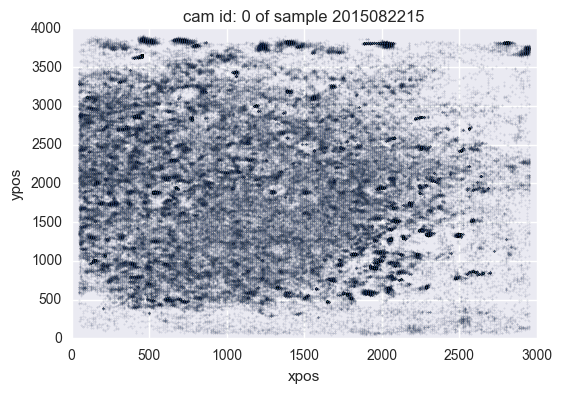

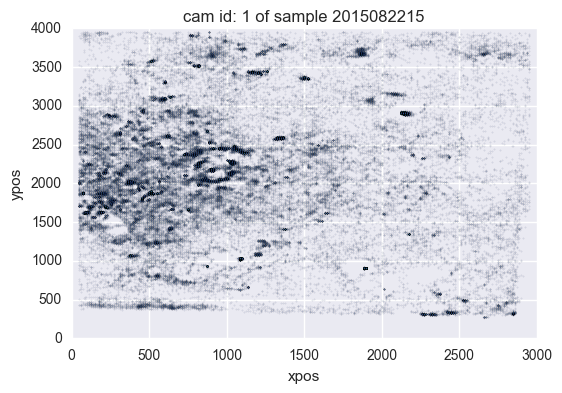

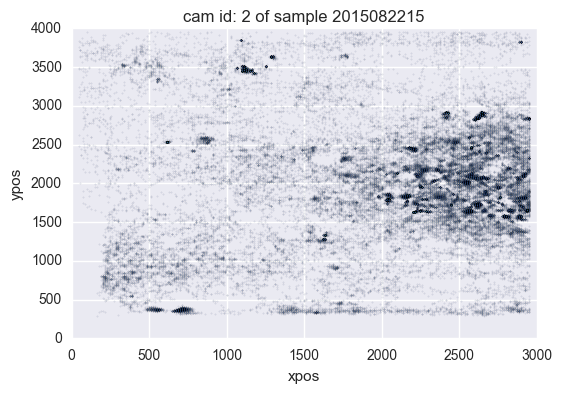

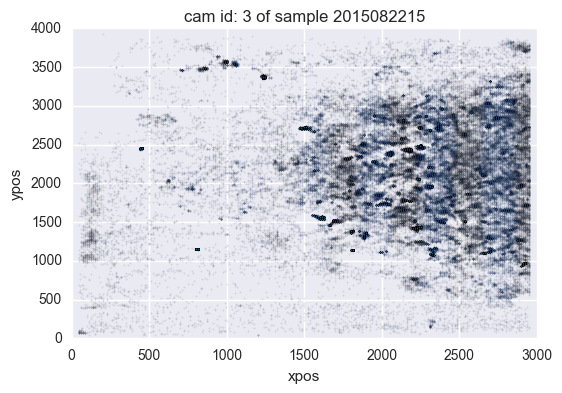

In [160]:
for f in folder_list[:1]:
    r = Repository(base+f)
    df = createDF(r, f)
#     print_stat(df,f)
    plot_xy_pos_alpha(df,f)
#     plot_rotation(df,f)